# Most frequent words from Positive labeled Tweets

In [1]:
#Get most frequent Words from Negative and Positive Tweets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import re
import contractions
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as im
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None  # default='warn'

file_name = '2900_per_day_sentiment'
#Import CSV and create DataFrame
df = pd.read_csv(file_name + '.csv')

#Get only text and sentiment columns by dropping all the others
df = df.drop(columns=['index', 'Unnamed: 0', 'Unnamed: 0.1', 'textblob_sent_scores', 'vader_sent_comp', 'TextBlob_sent'])

#Rename both columns
df.columns = ['text', 'sentiment']

#Create a DF with only positive sentiment tweets
df_pos = df[df['sentiment'] == 'pos']

#Clean Text
def clean(text):
    text = text.lower()                                          #Lowercase Tweets
    text = re.sub(r'&amp', '', text)                             #Remove '&amp' 
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)      #Delete URLs
    text = re.sub('@[^\s]+','',text)                             #Remove @Users
    text = re.sub('#[^\s]+','',text)                             #Remove Hashtags
    text = re.sub(r'[^a-zA-z\'\s\_\_]', '', text)                #Remove special characters such as #, -, " (? and ! in)
    text = text.replace(r"\n", " ")                              #Delete "\n"
    text = re.sub(r'\s+',' ', text)                              #Replace two or more spaces with only one
    return text

#Apply clean function
df_pos['text_cleaned'] = df_pos['text'].apply(clean)

#Expand contractions (output is a tokenized list)
df_pos['text_no_contractions'] = df_pos['text_cleaned'].apply(lambda x: [contractions.fix(word) for word in x.split()])

#Convert tokenized column into strings
df_pos['text_str'] = [' '.join(map(str, each)) for each in df_pos['text_no_contractions']]

#Tokenize again
df_pos['tokenized_text'] = df_pos['text_str'].apply(word_tokenize)
#print(df[['text_str', 'tokenized_text']].head())

#Remove stop words
stop_words = stopwords.words('english')
df_pos['tokenized_text_no_stopwords'] = df_pos['tokenized_text'].apply(lambda x: 
                                                                    [word for word in x 
                                                                     if word not in stop_words])
#Convert to String again
df_pos['text_str2'] = [' '.join(map(str, each)) for each in df_pos['tokenized_text_no_stopwords']]
#Drop unnecesary columns
df_pos = df_pos.drop(columns=['text', 'text_cleaned', 'text_no_contractions', 'text_str', 
                              'tokenized_text', 'tokenized_text_no_stopwords']).reset_index()

tweets_pos = df_pos['text_str2']
tweets_pos_arr = tweets_pos.to_numpy()
counter_pos = CountVectorizer()
tweets_pos2 = counter_pos.fit_transform(tweets_pos_arr)
tweets_df_pos = pd.DataFrame(tweets_pos2.toarray(), columns=counter_pos.get_feature_names())

top_words_pos = tweets_df_pos.sum().sort_values(ascending=False).iloc[0:500]
words_dict = top_words_pos.to_dict()

top_words_pos = top_words_pos.to_frame()
top_words_pos = top_words_pos.reset_index().rename(columns={'index': 'Word', 0:'Frequency'})

print(top_words_pos.head())

        Word  Frequency
0      trump      13983
1      covid       7350
2       like       2208
3   positive       1797
4  president       1734


### Create Wordcloud with most frequent words in positive labeled tweets

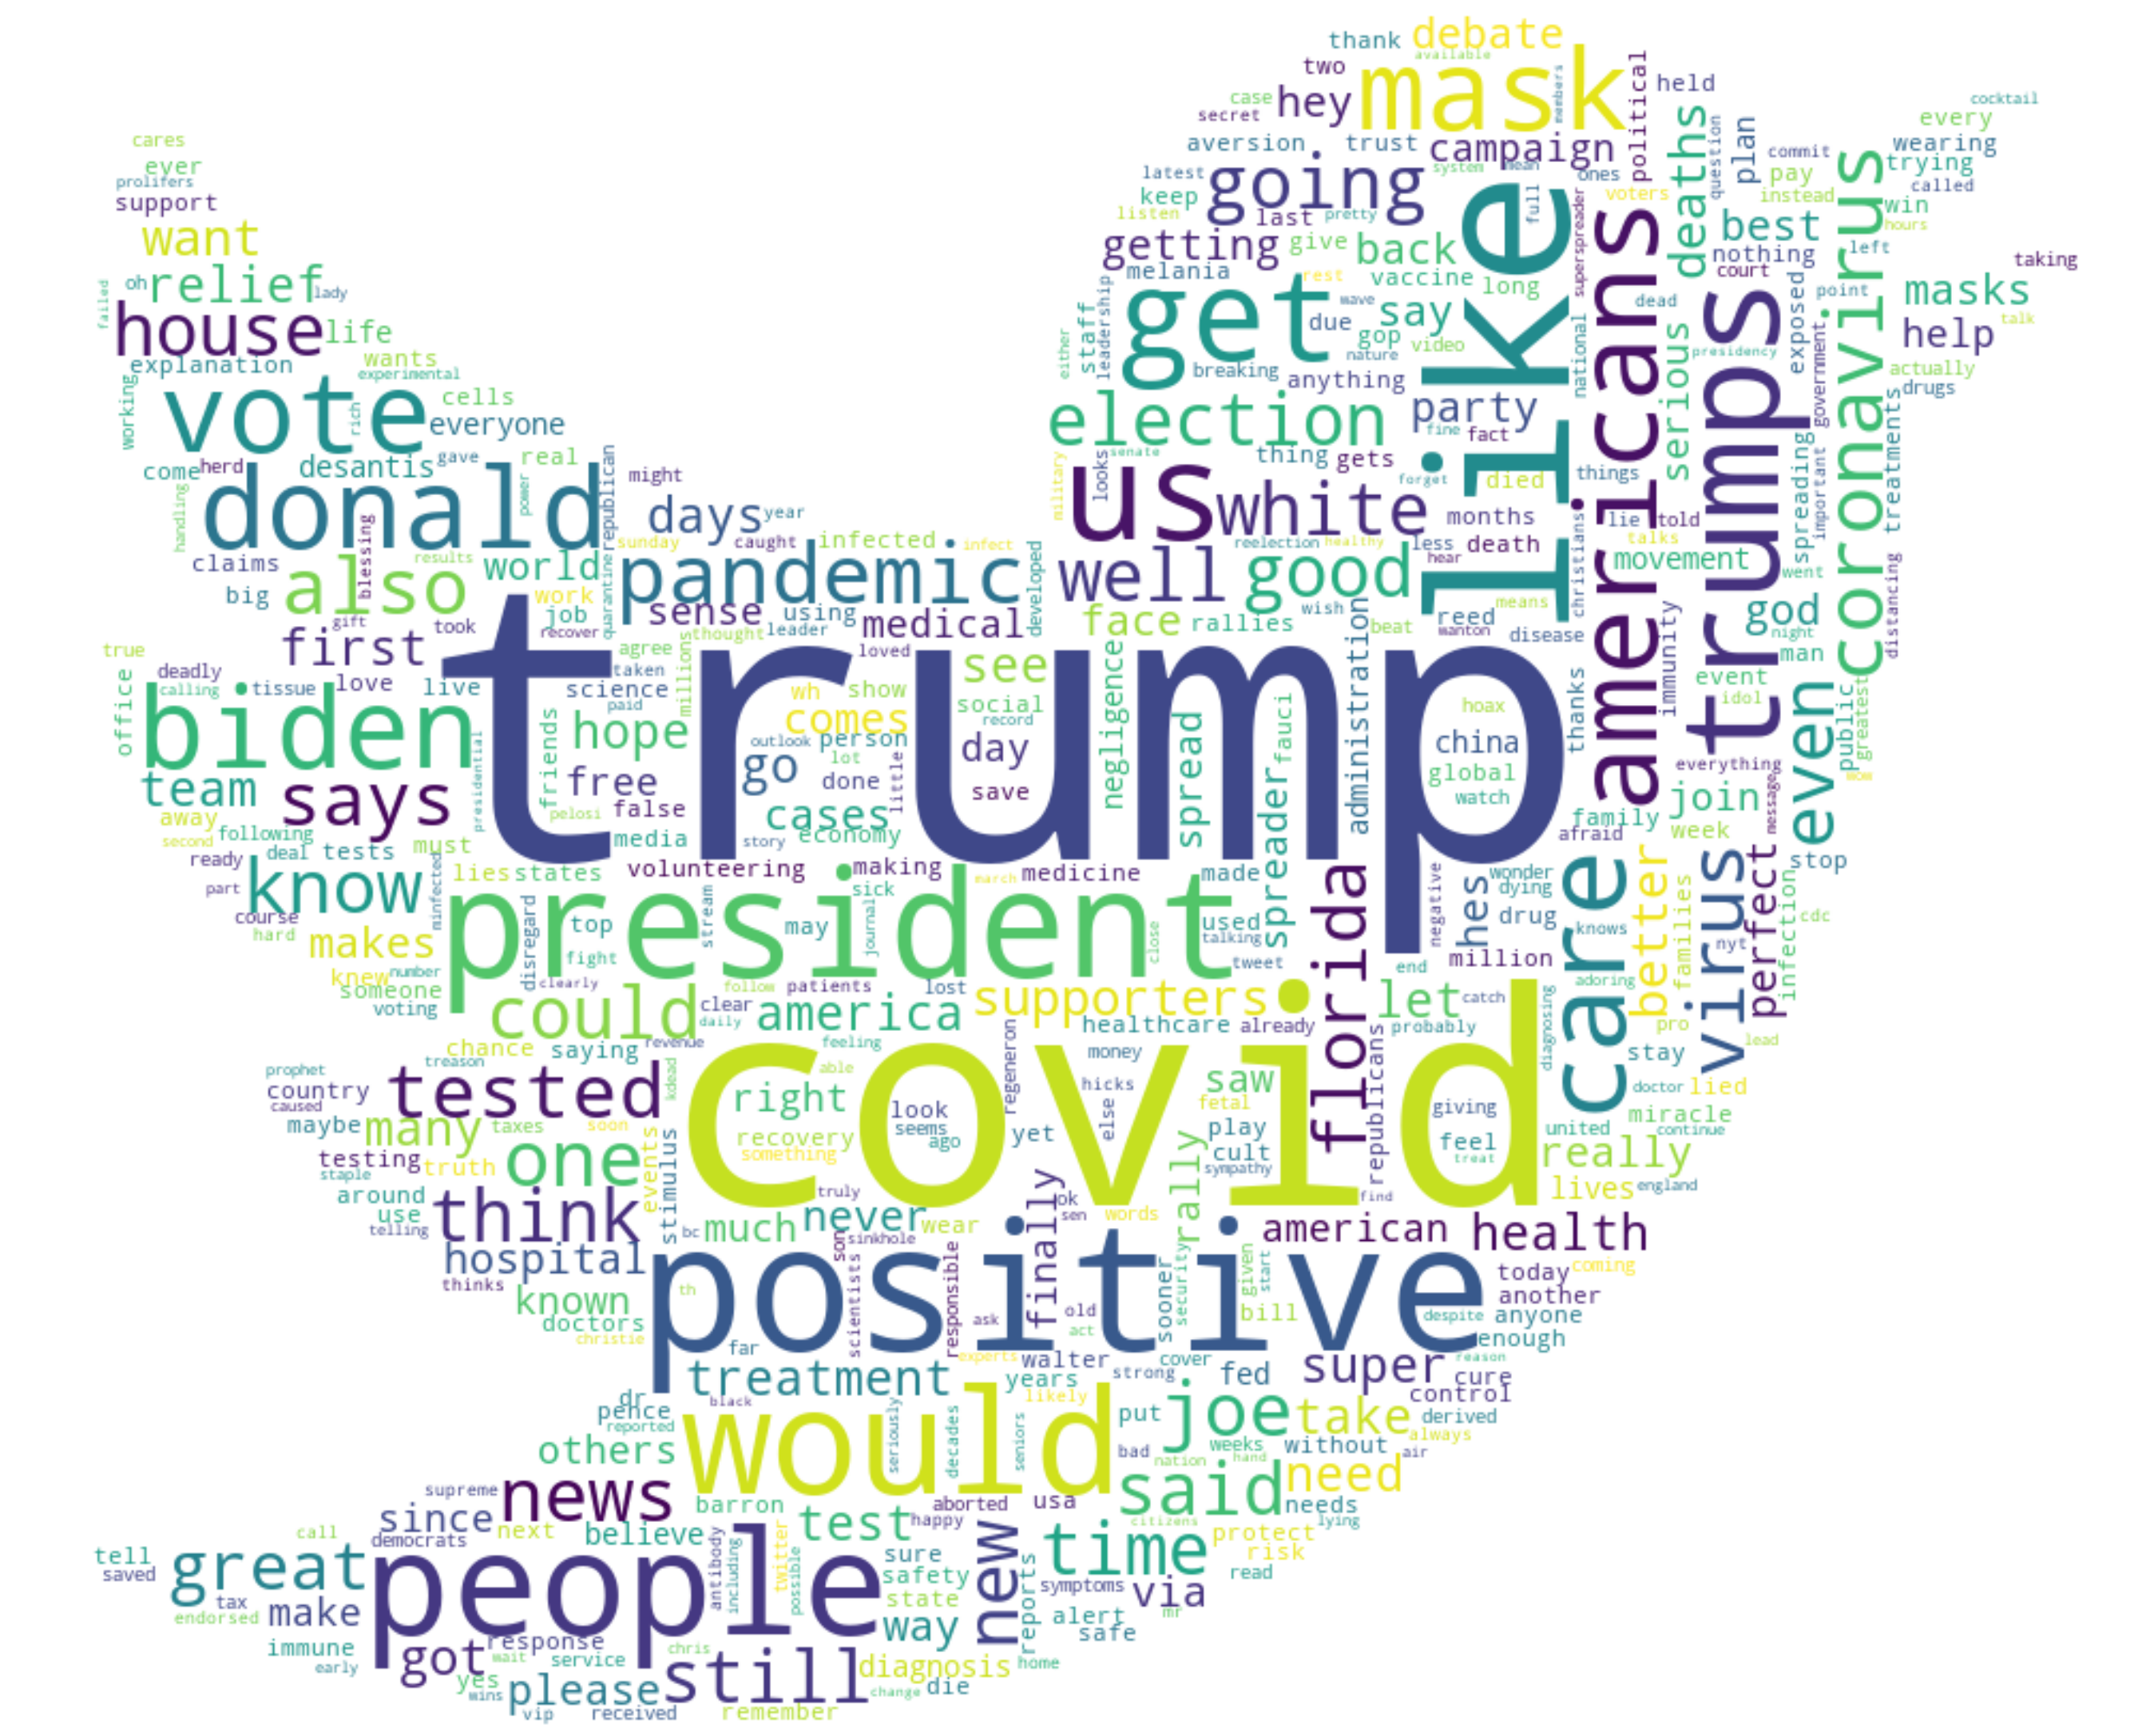

In [2]:
mask = np.array(Image.open('twitter_mask.png'))

from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    mask = mask,
    background_color = 'white', 
    max_words=None).generate_from_frequencies(words_dict)
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.close()

### Histogram of first 30 most frequent words in positive labeled tweets

           Word  Frequency
0         trump      13983
1         covid       7350
2          like       2208
3      positive       1797
4     president       1734
5         would       1693
6        people       1662
7            us       1476
8        trumps       1429
9           get       1251
10         vote        986
11        biden        975
12       donald        963
13         care        954
14         mask        949
15    americans        936
16     pandemic        915
17  coronavirus        846
18          one        797
19        virus        794
20         also        787
21       tested        761
22         says        729
23          joe        718
24         news        715
25         know        707
26        going        706
27          new        685
28         well        672
29     election        666


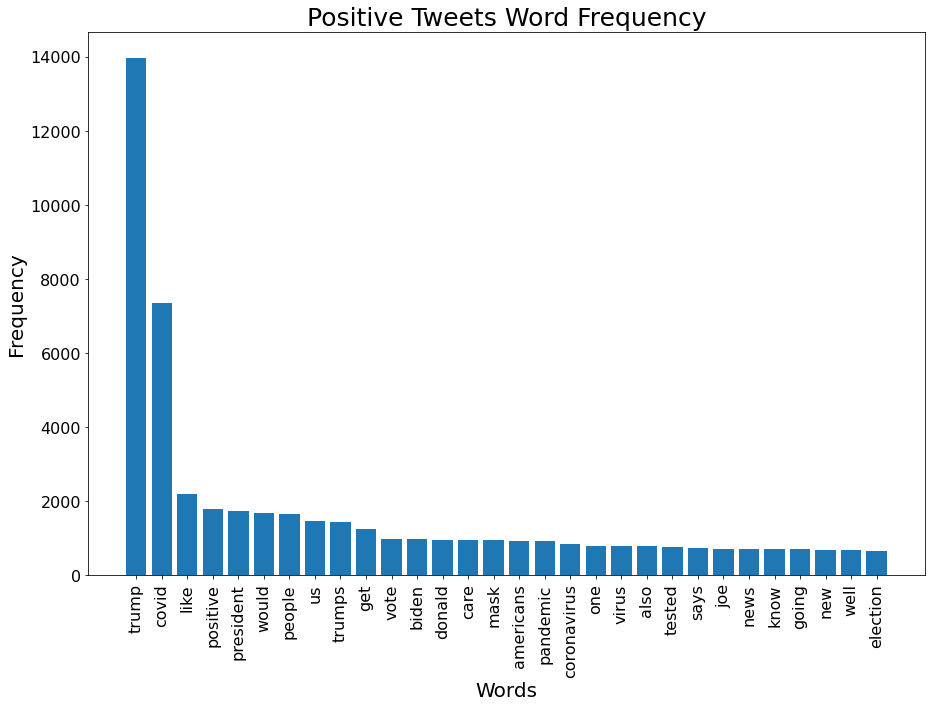

In [3]:
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
top_words_pos = top_words_pos.iloc[0:30]
print(top_words_pos)
fig, ax = plt.subplots(figsize=[15,10])
plt.bar(top_words_pos['Word'], top_words_pos['Frequency'])
plt.title("Positive Tweets Word Frequency", fontsize=25)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Words", fontsize=20)
plt.xticks(rotation=90)
ax.tick_params(axis='x', which='major', pad=5)
plt.show()